## Testing model for bias
Running test on two decks with randomly selected cards from the same Minion bucket.
Outcome should be 50/50 win/loss.

In [1]:
import os
import pandas as pd
df = pd.read_csv('data/results/mean_should_be_5.csv')
print(df.shape)
df.head()

(20, 3)


,generation,deck_uid,win_rate
0,0,kknmoknikklikjonknlkjnilnoikon,5
1,0,jojnmonojnnnnkiiljilnnomollnli,6
2,0,nnninmkjjillnmmlkkoknknilkmnno,5
3,0,nmkionklnmonkolnjiojolkollilni,3
4,0,ojjkkimklninjnonmimnnljjnommil,4


In [2]:
df["win_rate"].mean()

5.2

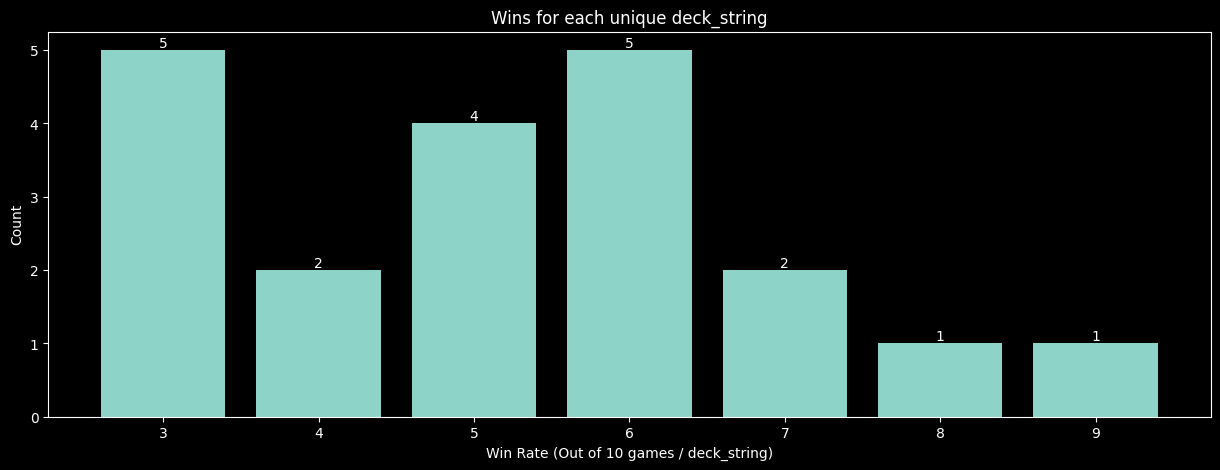

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

df = df.sort_values(by="win_rate")
grouped_df = df.groupby('win_rate').size().reset_index(name='count')

plt.figure(figsize=(15, 5))
bars = plt.bar(grouped_df['win_rate'], grouped_df['count'])

for bar, count in zip(bars, grouped_df['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.xlabel('Win Rate (Out of 10 games / deck_string)')
plt.ylabel('Count')
plt.title('Wins for each unique deck_string')
plt.show()

In [4]:
deck_uid_win_rate_5 = df[df['win_rate'] >= 7]['deck_uid'].tolist()

deck_uid_win_rate_5

['ikkloonmnnnlnninimmolomononllk',
 'limjnkknmjkkolkimjijjmkmijliln',
 'jlonioioijmnmoiomlnnnlnlmkojjo',
 'noookmjnnjomoniiklonmijmjjnnjm']

## Top 3 cards - first iteration

These top 3 cards were found in all top performing decks (5 wins / 20 games)

In [5]:
from collections import Counter
from card_wars.deck import DeckSerializer
from card_wars.import_cards import find_card

d = DeckSerializer()

all_strings = ''.join(deck_uid_win_rate_5)
char_count = Counter(all_strings)
most_common_chars = char_count.most_common(3)

for char, count in most_common_chars:
    percentage = (count / len(all_strings)) * 100
    card_id = (d.deserialize(short_string=char))
    card = find_card(card_id[0])

    print(f"{card.name} in {percentage:.2f}% of top decks.")
    print(f"{card}\n")

Goblin Necromancer in 20.83% of top decks.
[2/2] Mana: 2
Deathrattle: Summon a 2/2 Goblin.

Goblin Wingman in 16.67% of top decks.
[3/2] Mana: 3
Battlecry: Add a random Goblin to your hand.

Goblin Gambler in 15.00% of top decks.
[1/1] Mana: 1
Battlecry: Draw a card.



## Worst performing cards

In [6]:
worst = df[df['win_rate'] <= 3]['deck_uid'].tolist()

worst

['nmkionklnmonkolnjiojolkollilni',
 'mkljjnnlnnjkimionklminimnnmkjl',
 'llkknmojknmnmknoiolkknnjnimmko',
 'ojjimmnnoojjjojmmjillollnoikmi',
 'nniojljjnljjllojlnjlonnnkkjmln']

In [7]:
d = DeckSerializer()

all_strings = ''.join(worst)
char_count = Counter(all_strings)
most_common_chars = char_count.most_common(3)

for char, count in most_common_chars:
    percentage = (count / len(all_strings)) * 100
    card_id = (d.deserialize(short_string=char))
    card = find_card(card_id[0])

    print(f"{card.name} in {percentage:.2f}% of bottom decks.")
    print(f"{card}\n")

Goblin Necromancer in 21.33% of bottom decks.
[2/2] Mana: 2
Deathrattle: Summon a 2/2 Goblin.

Prince Gobb in 16.00% of bottom decks.
[5/5] Mana: 5
Battlecry: Give all friendly Goblin [+2/+2].

Bobblin The Goblin in 15.33% of bottom decks.
[4/3] Mana: 3




In [8]:
import os
import pandas as pd
df = pd.read_csv('data/results/goblin_vs_random.csv')
print(df.shape)
df.head()

(420, 3)


,generation,deck_uid,win_rate
0,0,cbtbndrqotmrcpsimghsauuktjrqmo,1
1,0,fdkhtbmgjeannfqubmhareujijifmi,3
2,0,kminhsqbhohqhetngmuknitcdessdd,2
3,0,jeaomhgrojbdggsggnjmidkprqgrkc,1
4,0,udctfpehlbbpthpkuooppncubokhku,1


In [9]:
df["win_rate"].mean() # This should be much lower

1.588095238095238

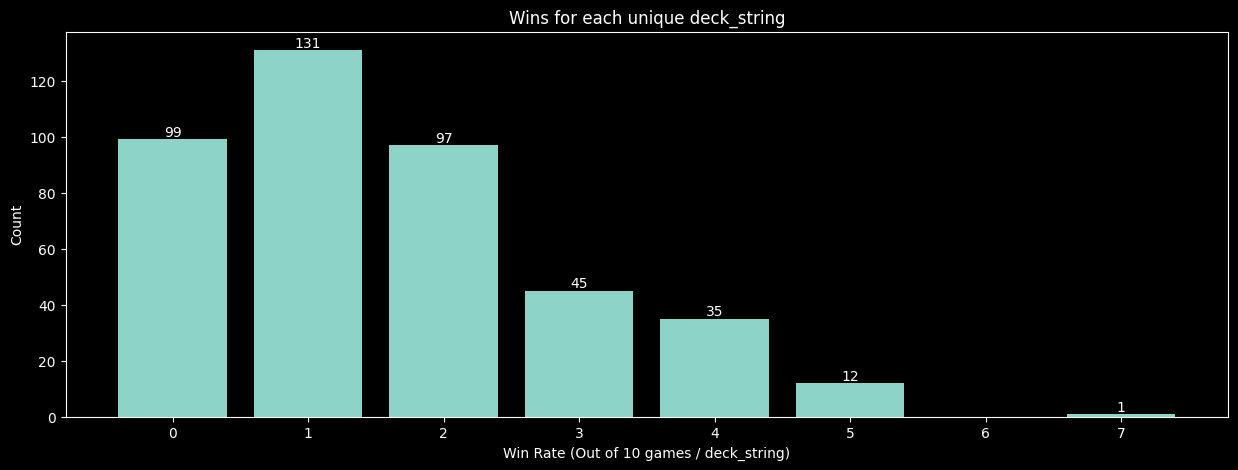

In [10]:
df = df.sort_values(by="win_rate")
grouped_df = df.groupby('win_rate').size().reset_index(name='count')

plt.figure(figsize=(15, 5))
bars = plt.bar(grouped_df['win_rate'], grouped_df['count'])

for bar, count in zip(bars, grouped_df['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.xlabel('Win Rate (Out of 10 games / deck_string)')
plt.ylabel('Count')
plt.title('Wins for each unique deck_string')
plt.show()

As exected, randomly selected decks performs much worse. But let's look at the deck that actually got 7 wins.

In [11]:
best_deck= df[df['win_rate'] >= 7]['deck_uid'].tolist()

best_deck

['bcflgnsonktlcaeinkthbmtnaidmkp']

In [12]:
from card_wars.deck import get_custom_deck
top_deck = get_custom_deck(d.deserialize(best_deck[0]))

print(top_deck)

Default Deck - [30/30] cards:
  ('mdra000', 'Dragonite')
  ('mdra001', 'Hatchling')
  ('mgno002', 'Gnomish Support Agent')
  ('mgob003', 'Prince Gobb')
  ('mgno003', 'Gnome Rider')
  ('mgob005', 'Goblin Necromancer')
  ('snat000', 'Wild Growth')
  ('mgob006', 'Goblin Wingman')
  ('mgob005', 'Goblin Necromancer')
  ('mgob002', 'Goblin Juggler')
  ('w000000', 'War Axe')
  ('mgob003', 'Prince Gobb')
  ('mdra001', 'Hatchling')
  ('mbea000', 'Lil Teddy')
  ('mgno001', 'Grandma Gnome')
  ('mgob000', 'Goblin')
  ('mgob005', 'Goblin Necromancer')
  ('mgob002', 'Goblin Juggler')
  ('w000000', 'War Axe')
  ('mgno004', 'Grand Gnome')
  ('mdra000', 'Dragonite')
  ('mgob004', 'Goblin Gambler')
  ('w000000', 'War Axe')
  ('mgob005', 'Goblin Necromancer')
  ('mbea000', 'Lil Teddy')
  ('mgob000', 'Goblin')
  ('mgno000', 'Gnome')
  ('mgob004', 'Goblin Gambler')
  ('mgob002', 'Goblin Juggler')
  ('mneu000', 'Praetorian Guard')



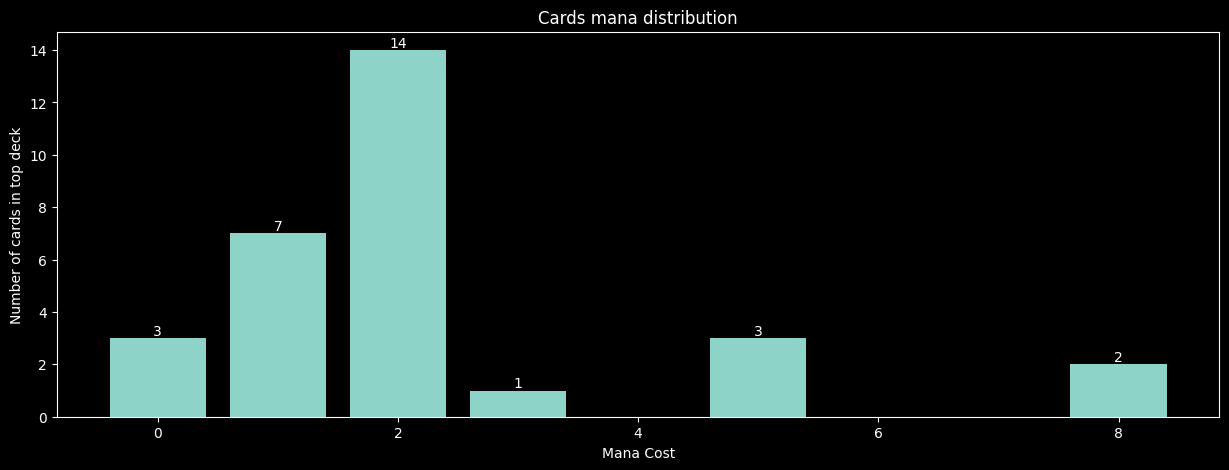

In [15]:
from card_wars.deck import Deck
top_deck.get_distribution()

# Count occurrences of each unique number
count_dict = {}
for rate in top_deck.get_distribution():
    count_dict[rate] = count_dict.get(rate, 0) + 1

# Sort the dictionary by win rate
sorted_counts = sorted(count_dict.items())

# Extract the sorted win rates and counts
win_rates_sorted, counts_sorted = zip(*sorted_counts)

# Plotting the bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(win_rates_sorted, counts_sorted)

for bar, count in zip(bars, counts_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.xlabel('Mana Cost')
plt.ylabel('Number of cards')
plt.title('Cards mana distribution in top deck')
plt.show()
